In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
fruits = np.load("/home/aa/Big2025/ml_dl_python/data/fruits_300.npy")
print(fruits.shape)

(300, 100, 100)


In [128]:
fruits_2d = fruits.reshape(300, 10000)

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(fruits_2d)

PCA(n_components=10)

In [130]:
print(pca.components_.shape)

(10, 10000)


In [131]:
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

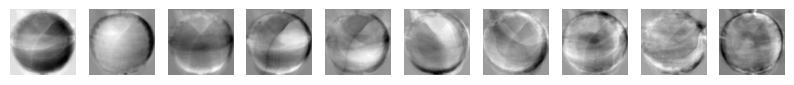

In [132]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [133]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10)


In [134]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


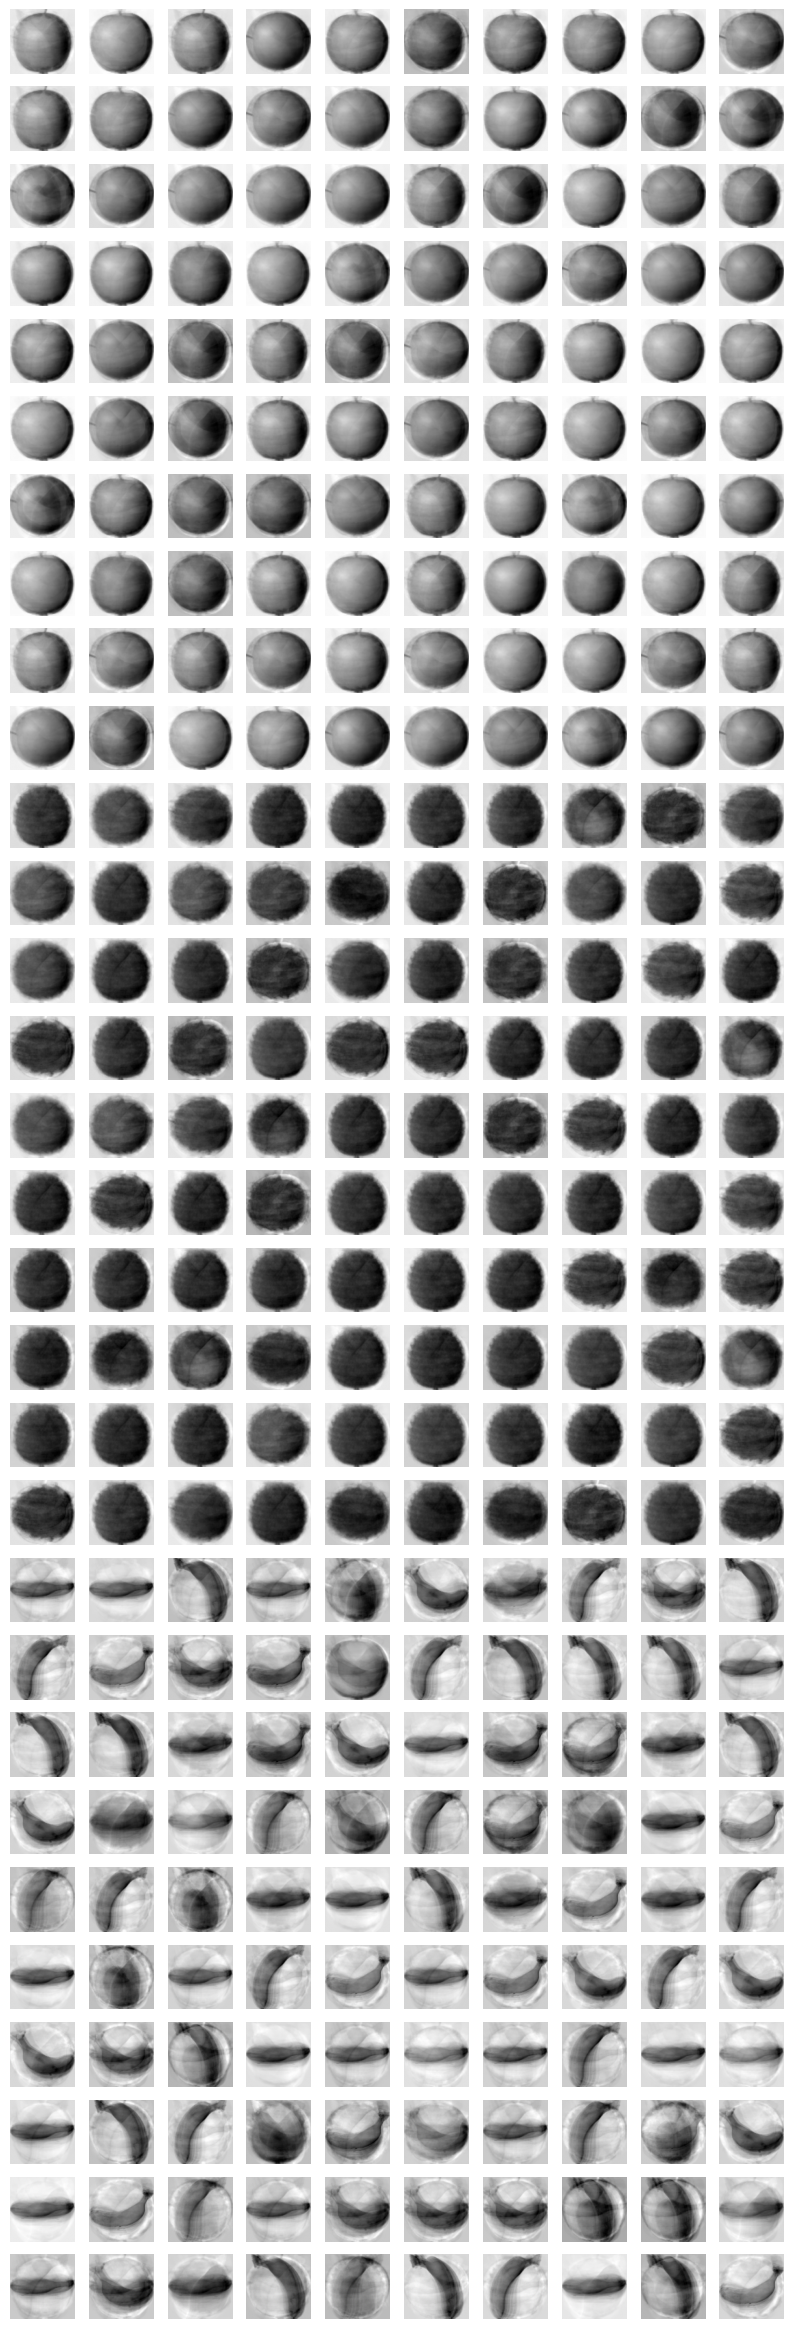

In [135]:
# 정보손실 확인
draw_fruits(fruits_inverse.reshape(300, 100, 100))

In [136]:
# 분산값 확인
print(np.sum(pca.explained_variance_ratio_))

0.769492893609892


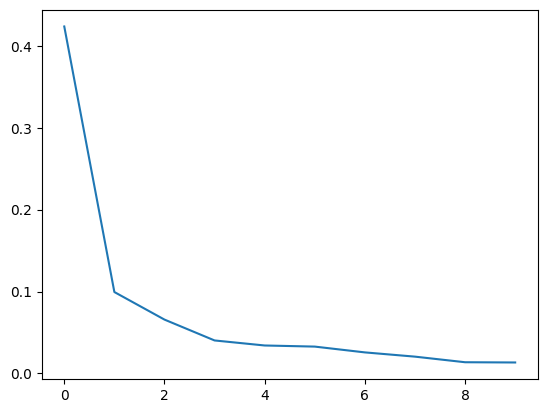

In [137]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [138]:
# 로지스틱 적용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [139]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [151]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) # pca 미적용
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
1.8458812713623047


In [152]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.020103597640991212


In [142]:
# pca된 자료에 kmean을 적용
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [143]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


# kmean
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
# pca + kmean
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]

똑같이 나왔다

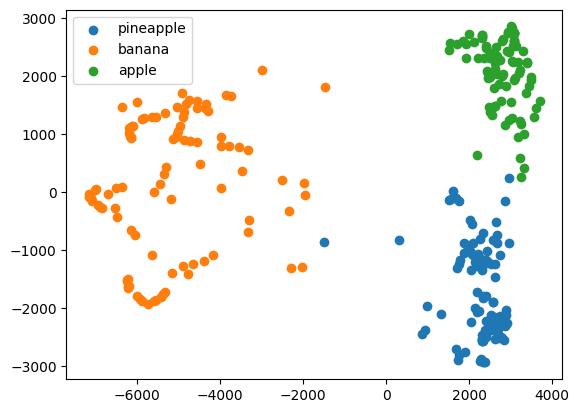

In [144]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label] # 10개
    plt.scatter(data[:,0], data[:,1]) # 여길 바꿔서 변화에 따른 변동 확인
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

In [153]:
# 계측적 군집화
# tree를 활용한 군집화를 한다고 생각하면 됨
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

cluster = AgglomerativeClustering(n_clusters=10, metric="euclidean", linkage="ward")
labels = cluster.fit(fruits_pca)
# metric(affinity) => kmean을 할 때 어떤 방법을 쓸거냐
# 'euclidean','manhattan', 'cosine', 'precomputed' 선택 가능, default는 'euclidean'
# 멘헤튼: 격자무늬: 가로세로길이계산
# 유클리디안: 

In [154]:
print(labels.labels_)

[4 8 4 3 8 4 8 8 8 3 4 8 3 3 3 4 8 3 4 3 3 3 3 3 3 4 4 8 3 4 8 8 8 8 3 3 3
 3 3 3 8 3 4 4 4 3 4 8 8 8 8 3 4 8 8 3 8 8 3 8 3 8 4 4 3 4 8 3 8 4 8 8 4 8
 8 4 8 8 8 4 4 3 4 3 8 3 8 8 3 4 3 4 8 8 3 3 3 3 4 3 6 2 2 6 6 6 6 2 2 2 2
 6 2 2 2 6 2 2 6 2 2 6 6 2 2 6 2 6 2 6 2 6 2 6 2 2 6 6 6 2 2 2 2 2 6 6 2 2
 6 6 6 2 6 2 6 6 6 6 6 2 6 6 6 6 6 6 6 2 2 2 6 2 2 2 6 6 6 6 2 2 6 6 6 2 6
 6 6 6 6 2 2 6 2 6 2 6 2 2 6 2 1 1 7 1 0 0 1 5 0 7 5 9 0 9 0 5 7 7 7 1 7 7
 1 9 0 1 9 9 1 7 0 1 1 5 0 5 9 0 1 9 5 5 0 1 1 7 1 9 1 5 1 0 1 5 9 1 9 0 5
 0 0 0 7 1 1 1 1 5 1 1 1 7 5 0 9 0 1 5 9 0 1 9 5 1 0 0 0 7 7 1 1 0 1 7 5 7
 5 1 7 9]


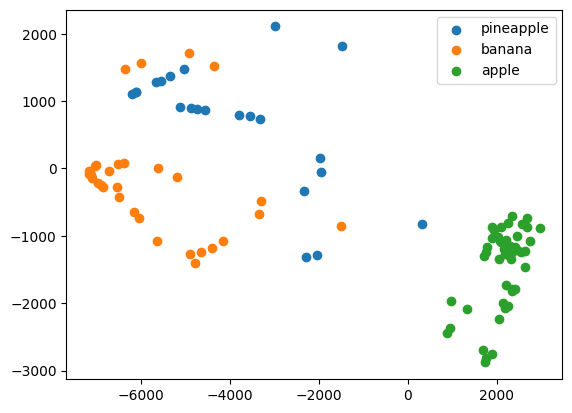

In [155]:
for label in range(0, 3):
    data = fruits_pca[labels.labels_ == label]  # 10 개
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(["pineapple", "banana", "apple"])
plt.show()